# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Muhammad Baqir Shaoma
- **Email:** baqirshaoma@gmail.com
- **ID Dicoding:** baqir777

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Berapa peningkatan persentase penjualan produk dalam kategori "kesehatan & kecantikan" selama kuartal terakhir dibandingkan dengan kuartal sebelumnya?
- Pertanyaan 2
Strategi pemasaran apa yang dapat diterapkan untuk meningkatkan penjualan produk dengan rating ulasan pelanggan di bawah 3 bintang dalam 3 bulan ke depan?
- Pertanyaan 3
Bagaimana kita dapat mengurangi waktu pengiriman rata-rata pesanan sebesar 10% dalam 6 bulan ke depan dengan mengoptimalkan lokasi gudang dan proses logistik?
- Pertanyaan 4
Kota mana yang memiliki tingkat pembatalan pesanan tertinggi, dan apa faktor-faktor yang berkontribusi terhadap hal ini? Bagaimana kita dapat mengurangi tingkat pembatalan pesanan di kota tersebut sebesar 5% dalam kuartal berikutnya?
- Pertanyaan 5
Produk apa yang paling sering dibeli bersama dalam satu pesanan, dan bagaimana kita dapat memanfaatkan informasi ini untuk meningkatkan penjualan melalui rekomendasi produk yang lebih efektif?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_dataset_df = pd.read_csv("/content/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_translation_df = pd.read_csv("/content/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_dataset_df = pd.read_csv("/content/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_dataset_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [11]:
# Assessing customers_df
print("===== Assessing customers_df =====")
customers_df.info()
customers_df.describe()
customers_df.isnull().sum()

===== Assessing customers_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
# Assessing geolocation_df
print("===== Assessing geolocation_df =====")
geolocation_df.info()
geolocation_df.describe()
geolocation_df.isnull().sum()

===== Assessing geolocation_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [13]:
# Assessing order_items_df
print("===== Assessing order_items_df =====")
order_items_df.info()
order_items_df.describe()
order_items_df.isnull().sum()

===== Assessing order_items_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [14]:
# Assessing order_payments_df
print("===== Assessing order_payments_df =====")
order_payments_df.info()
order_payments_df.describe()
order_payments_df.isnull().sum()

===== Assessing order_payments_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [15]:
# Assessing order_reviews_df
print("===== Assessing order_reviews_df =====")
order_reviews_df.info()
order_reviews_df.describe()
order_reviews_df.isnull().sum()

===== Assessing order_reviews_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [16]:
# Assessing orders_dataset_df
print("===== Assessing orders_dataset_df =====")
orders_dataset_df.info()
orders_dataset_df.describe()
orders_dataset_df.isnull().sum()

===== Assessing orders_dataset_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [17]:
# Assessing product_category_name_translation_df
print("===== Assessing product_category_name_translation_df =====")
product_category_name_translation_df.info()
product_category_name_translation_df.describe()
product_category_name_translation_df.isnull().sum()

===== Assessing product_category_name_translation_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


In [18]:
# Assessing products_dataset_df
print("===== Assessing products_dataset_df =====")
products_dataset_df.info()
products_dataset_df.describe()
products_dataset_df.isnull().sum()

===== Assessing products_dataset_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [19]:
# Assessing sellers_dataset_df
print("===== Assessing sellers_dataset_df =====")
sellers_dataset_df.info()
sellers_dataset_df.describe()
sellers_dataset_df.isnull().sum()

===== Assessing sellers_dataset_df =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [20]:
# Check data duplication in all dataframe
customers_df_duplicate = customers_df.duplicated().sum()
geolocation_df_duplicate = geolocation_df.duplicated().sum()
order_items_df_duplicate = order_items_df.duplicated().sum()
order_payments_df_duplicate = order_payments_df.duplicated().sum()
order_reviews_df_duplicate = order_reviews_df.duplicated().sum()
orders_dataset_df_duplicate = orders_dataset_df.duplicated().sum()
product_category_name_translation_df_duplicate = product_category_name_translation_df.duplicated().sum()
products_dataset_df_duplicate = products_dataset_df.duplicated().sum()
sellers_dataset_df_duplicate = sellers_dataset_df.duplicated().sum()

print("===== Data Duplication in customers_df =====")
print(customers_df_duplicate)
print("\n===== Data Duplication in geolocation_df =====")
print(geolocation_df_duplicate)
print("\n===== Data Duplication in order_items_df =====")
print(order_items_df_duplicate)
print("\n===== Data Duplication in order_payments_df =====")
print(order_payments_df_duplicate)
print("\n===== Data Duplication in order_reviews_df =====")
print(order_reviews_df_duplicate)
print("\n===== Data Duplication in orders_dataset_df =====")
print(orders_dataset_df_duplicate)
print("\n===== Data Duplication in product_category_name_translation_df =====")
print(product_category_name_translation_df_duplicate)
print("\n===== Data Duplication in products_dataset_df =====")
print(products_dataset_df_duplicate)
print("\n===== Data Duplication in sellers_dataset_df =====")
print(sellers_dataset_df_duplicate)


===== Data Duplication in customers_df =====
0

===== Data Duplication in geolocation_df =====
261831

===== Data Duplication in order_items_df =====
0

===== Data Duplication in order_payments_df =====
0

===== Data Duplication in order_reviews_df =====
0

===== Data Duplication in orders_dataset_df =====
0

===== Data Duplication in product_category_name_translation_df =====
0

===== Data Duplication in products_dataset_df =====
0

===== Data Duplication in sellers_dataset_df =====
0


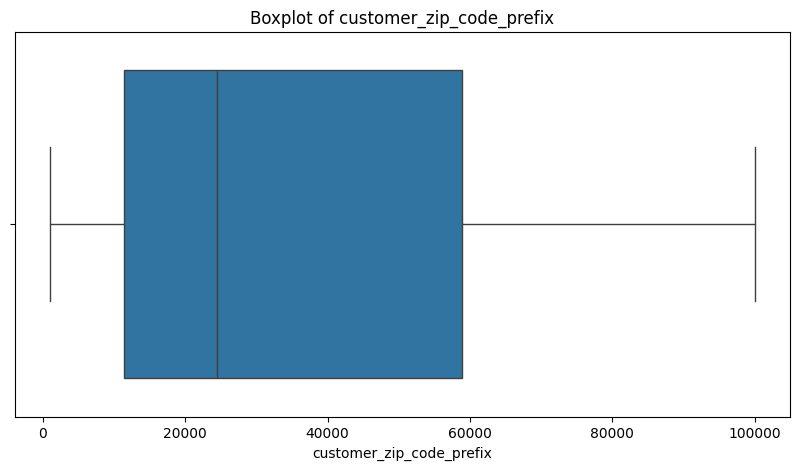

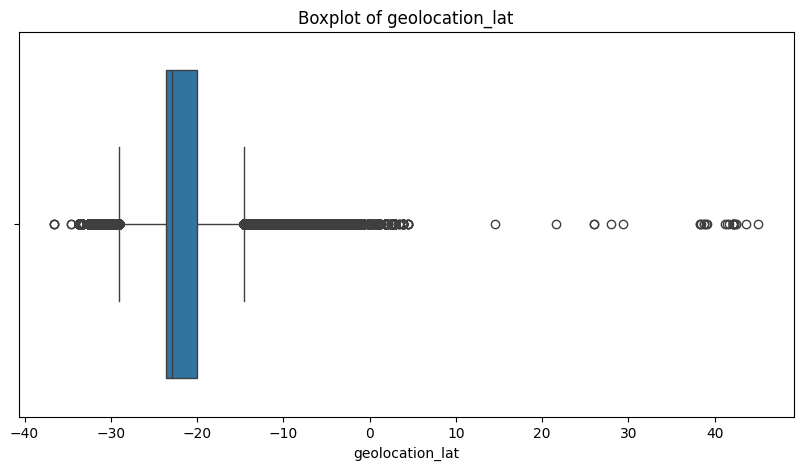

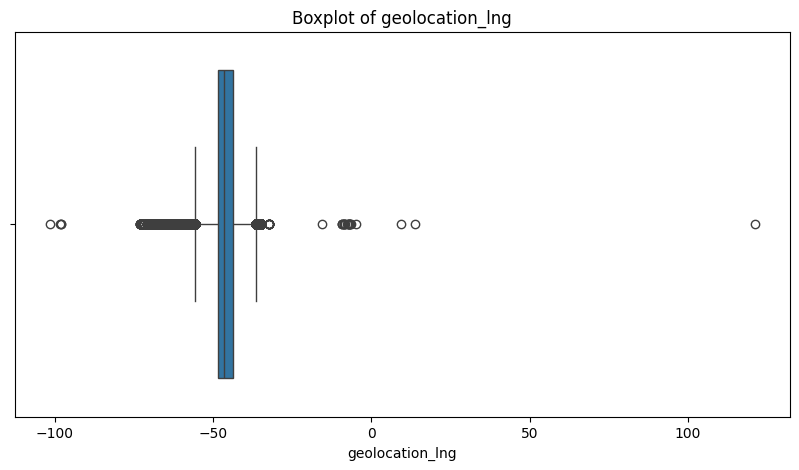

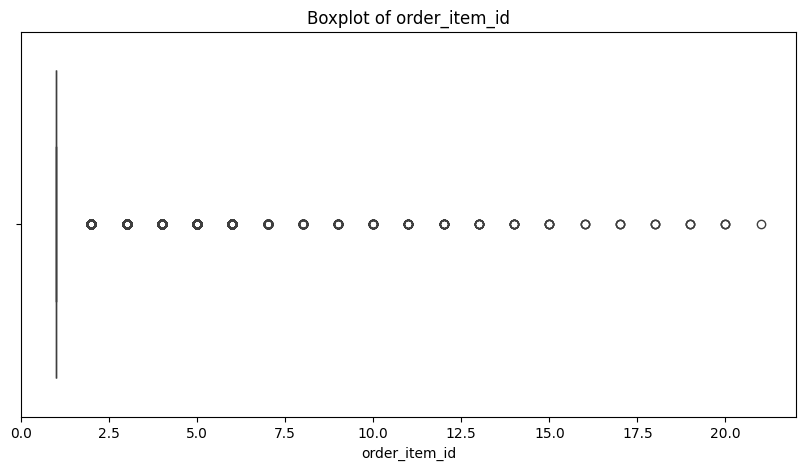

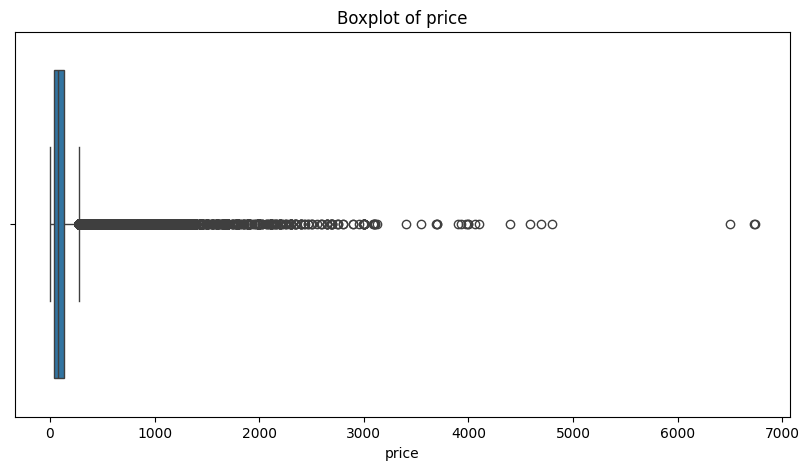

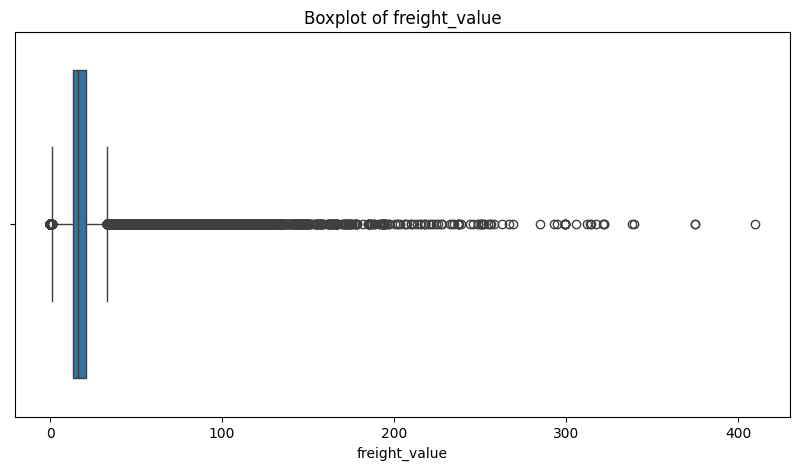

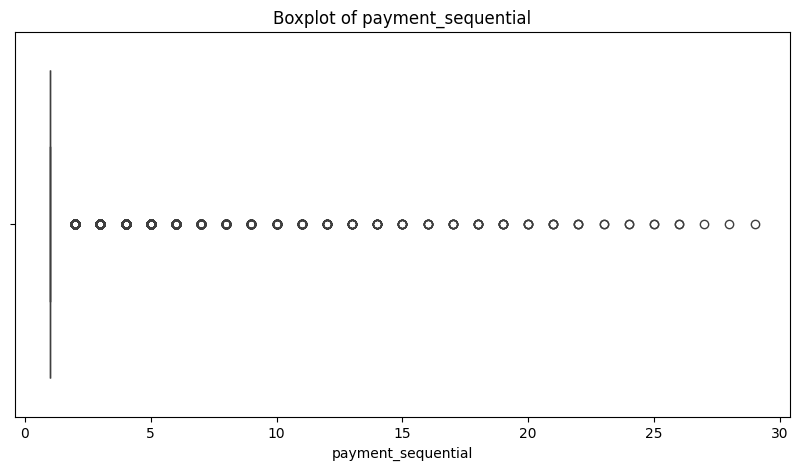

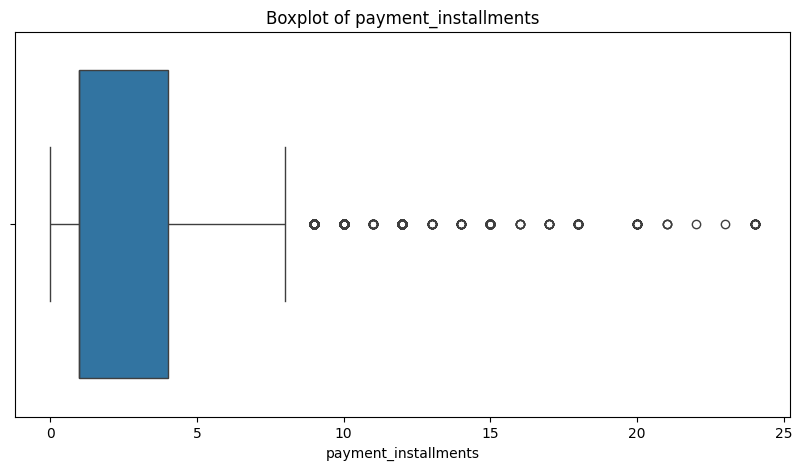

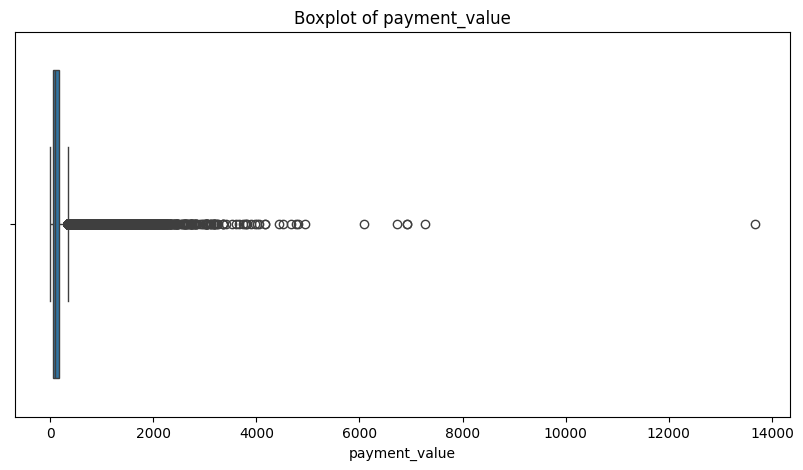

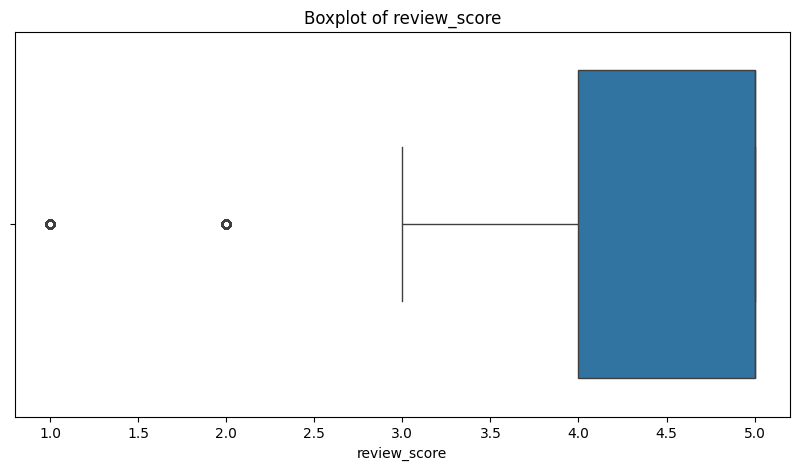

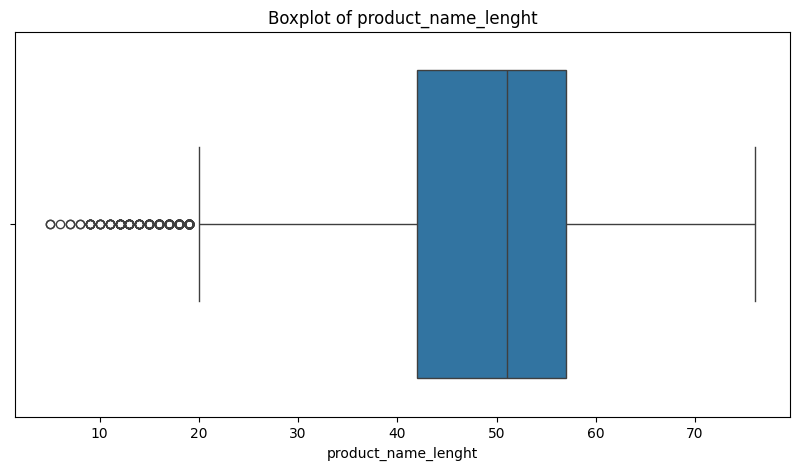

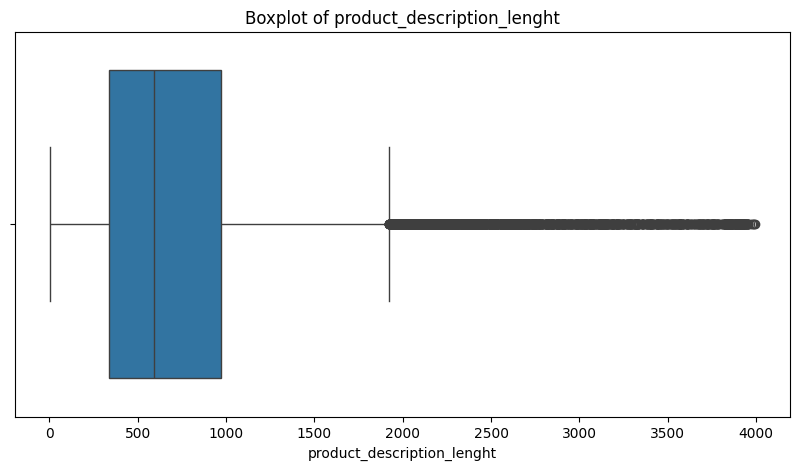

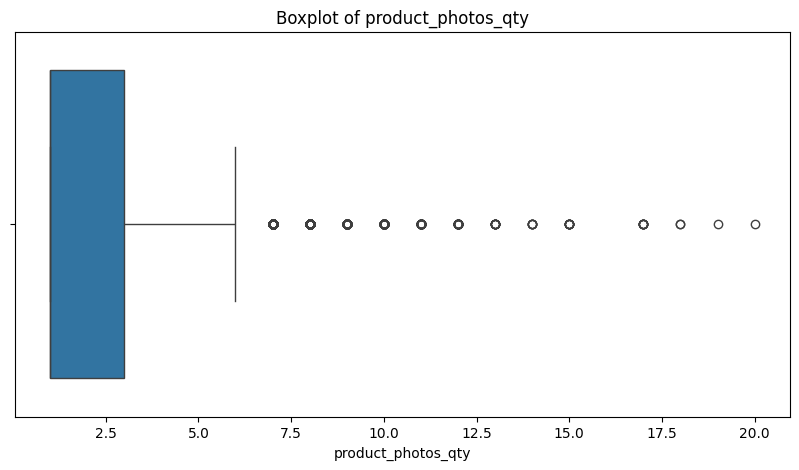

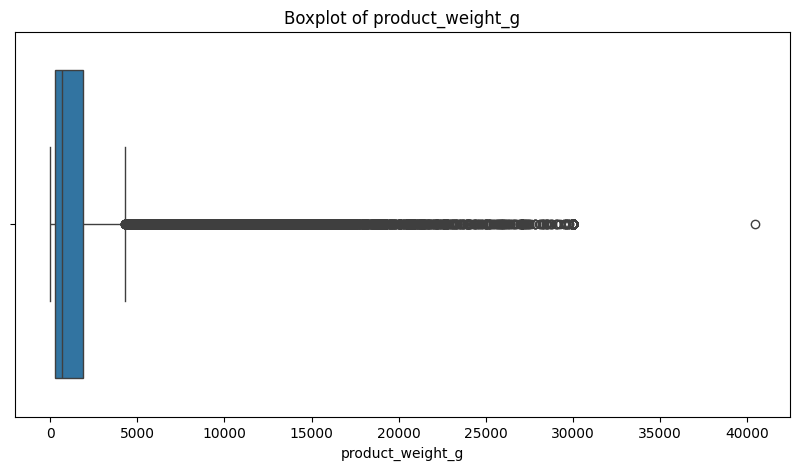

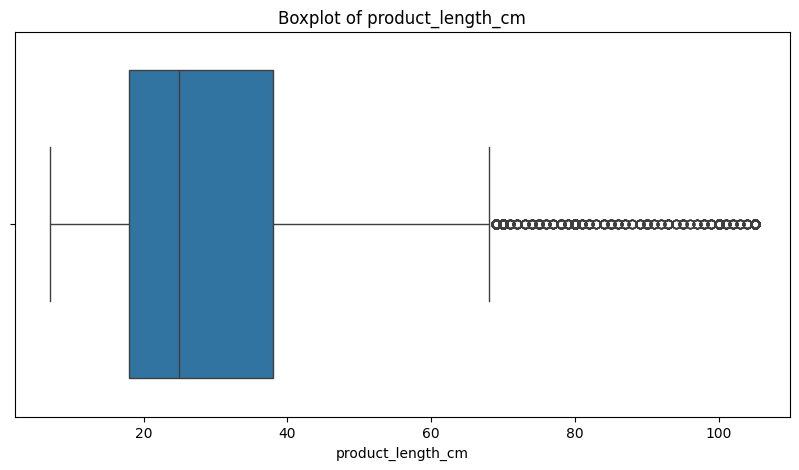

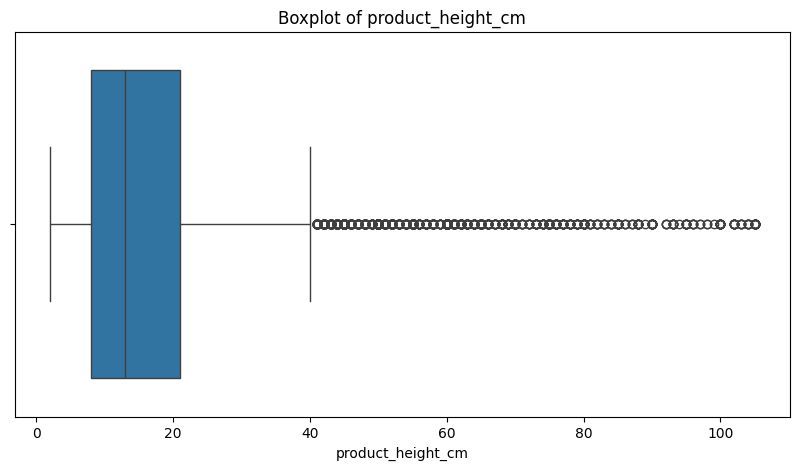

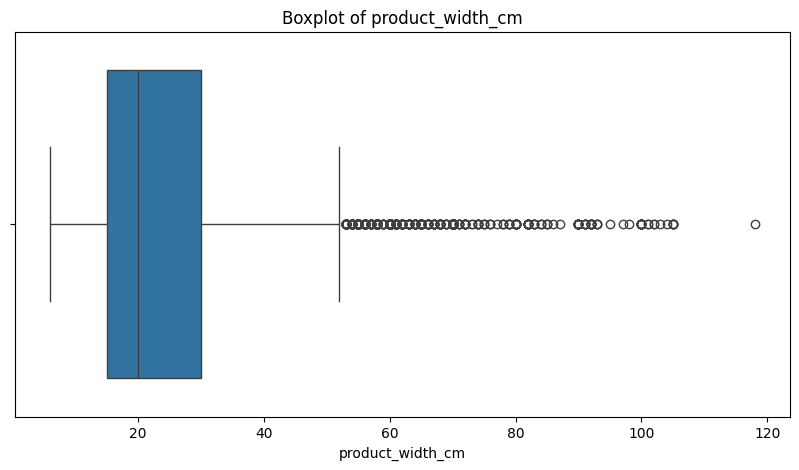

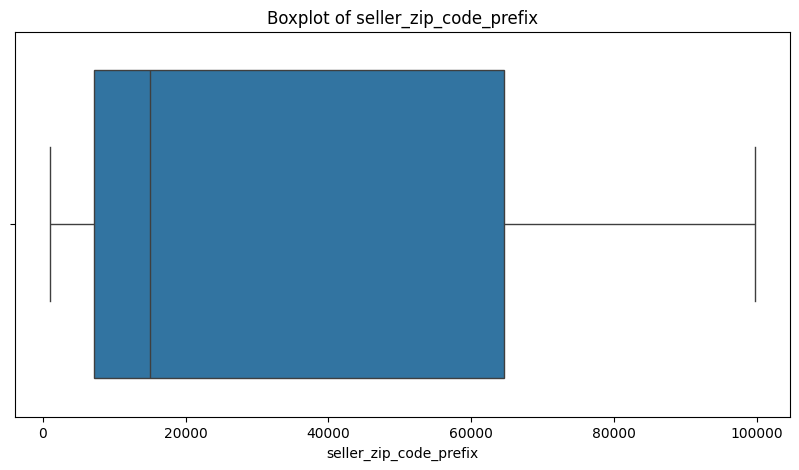

In [21]:
# Check outlier

import matplotlib.pyplot as plt
# Check outlier in numerical columns in customers_df
numerical_columns_customers = ['customer_zip_code_prefix']
for column in numerical_columns_customers:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=customers_df[column])
  plt.title('Boxplot of {}'.format(column))
  plt.show()

# Check outlier in numerical columns in geolocation_df
numerical_columns_geolocation = ['geolocation_lat', 'geolocation_lng']
for column in numerical_columns_geolocation:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=geolocation_df[column])
  plt.title('Boxplot of {}'.format(column))
  plt.show()

# Check outlier in numerical columns in order_items_df
numerical_columns_order_items = ['order_item_id', 'price', 'freight_value']
for column in numerical_columns_order_items:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=order_items_df[column])
  plt.title('Boxplot of {}'.format(column))
  plt.show()

# Check outlier in numerical columns in order_payments_df
numerical_columns_order_payments = ['payment_sequential', 'payment_installments', 'payment_value']
for column in numerical_columns_order_payments:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=order_payments_df[column])
  plt.title('Boxplot of {}'.format(column))
  plt.show()

# Check outlier in numerical columns in order_reviews_df
numerical_columns_order_reviews = ['review_score']
for column in numerical_columns_order_reviews:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=order_reviews_df[column])
  plt.title('Boxplot of {}'.format(column))
  plt.show()

# Check outlier in numerical columns in products_dataset_df
numerical_columns_products_dataset = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for column in numerical_columns_products_dataset:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=products_dataset_df[column])
  plt.title('Boxplot of {}'.format(column))
  plt.show()

# Check outlier in numerical columns in sellers_dataset_df
numerical_columns_sellers_dataset = ['seller_zip_code_prefix']
for column in numerical_columns_sellers_dataset:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=sellers_dataset_df[column])
  plt.title('Boxplot of {}'.format(column))
  plt.show()

### Cleaning Data

In [22]:
# Fixed data duplicate pada geolocation_df

geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0



> Penanganan missing value pada products_dataset_df



In [23]:
# Filter data untuk melihat missing values
products_dataset_df[products_dataset_df.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [24]:
# Identifikasi nilai dominan pada kolom 'product_category_name'
products_dataset_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [25]:
# Isi missing value dengan nilai dominan 'cama_mesa_banho'
products_dataset_df['product_category_name'].fillna('cama_mesa_banho', inplace=True)
products_dataset_df[products_dataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [26]:
# Identifikasi nilai dominan pada kolom 'product_name_lenght'
products_dataset_df.product_name_lenght.value_counts()

,count
product_name_lenght,
60.0,2182
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [27]:
# Isi missing value dengan nilai dominan 40.0
products_dataset_df['product_name_lenght'].fillna(40.0, inplace=True)
products_dataset_df[products_dataset_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [28]:
# Identifikasi nilai dominan pada kolom 'product_description_lenght'
products_dataset_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [29]:
# Isi missing value dengan nilai dominan 40
products_dataset_df['product_description_lenght'].fillna(40.0, inplace=True)

In [30]:
# Identifikasi nilai dominan pada kolom 'product_photos_qty'
products_dataset_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [31]:
# Isi missing value dengan nilai dominan 1.0
products_dataset_df['product_photos_qty'].fillna(1.0, inplace=True)
# Identifikasi nilai dominan pada kolom 'product_weight_g'
products_dataset_df.product_weight_g.value_counts()
# Isi missing value dengan nilai dominan 2000.0
products_dataset_df['product_weight_g'].fillna(2000.0, inplace=True)
# Identifikasi nilai dominan pada kolom 'product_length_cm'
products_dataset_df.product_length_cm.value_counts()
# Isi missing value dengan nilai dominan 30.0
products_dataset_df['product_length_cm'].fillna(30.0, inplace=True)
# Identifikasi nilai dominan pada kolom 'product_height_cm'
products_dataset_df.product_height_cm.value_counts()
# Isi missing value dengan nilai dominan 10.0
products_dataset_df['product_height_cm'].fillna(10.0, inplace=True)
# Identifikasi nilai dominan pada kolom 'product_width_cm'
products_dataset_df.product_width_cm.value_counts()
# Isi missing value dengan nilai dominan 20.0
products_dataset_df['product_width_cm'].fillna(20.0, inplace=True)

In [32]:
# Identifikasi nilai dominan pada kolom 'product_weight_g'
products_dataset_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [33]:
# Isi missing value dengan nilai dominan 2000.0
products_dataset_df['product_weight_g'].fillna(2000.0, inplace=True)

In [34]:
# Identifikasi nilai dominan pada kolom 'product_length_cm'
products_dataset_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2031
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [35]:
# Isi missing value dengan nilai dominan 30.0
products_dataset_df['product_length_cm'].fillna(30.0, inplace=True)

In [36]:
# Identifikasi nilai dominan pada kolom 'product_height_cm'
products_dataset_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2550
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [37]:
# Isi missing value dengan nilai dominan 10.0
products_dataset_df['product_height_cm'].fillna(10.0, inplace=True)

In [38]:
# Identifikasi nilai dominan pada kolom 'product_width_cm'
products_dataset_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3055
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [39]:
# Isi missing value dengan nilai dominan 20.0
products_dataset_df['product_width_cm'].fillna(20.0, inplace=True)

In [40]:
# Cek kembali missing value yang telah dibersihkan
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [41]:
# Filter data pada order_reviews_df untuk melihat missing value
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [42]:
# Isi missing value dengan string kosong
order_reviews_df['review_comment_message'].fillna('', inplace=True)

# Cek kembali missing value yang telah dibersihkan
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0




> Penanganan missing value pada orders_dataset_df



In [43]:
# Filter data pada orders_dataset_df untuk melihat missing value
orders_dataset_df[orders_dataset_df.isnull().any(axis=1)]
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [44]:
# Isi missing value pada kolom 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', dan 'order_estimated_delivery_date' dengan modus dari masing-masing kolom
mode_order_approved_at = orders_dataset_df['order_approved_at'].mode()[0]
mode_order_delivered_carrier_date = orders_dataset_df['order_delivered_carrier_date'].mode()[0]
mode_order_delivered_customer_date = orders_dataset_df['order_delivered_customer_date'].mode()[0]
mode_order_estimated_delivery_date = orders_dataset_df['order_estimated_delivery_date'].mode()[0]

orders_dataset_df['order_approved_at'].fillna(mode_order_approved_at, inplace=True)
orders_dataset_df['order_delivered_carrier_date'].fillna(mode_order_delivered_carrier_date, inplace=True)
orders_dataset_df['order_delivered_customer_date'].fillna(mode_order_delivered_customer_date, inplace=True)
orders_dataset_df['order_estimated_delivery_date'].fillna(mode_order_estimated_delivery_date, inplace=True)

# Cek kembali missing value yang telah dibersihkan
orders_dataset_df.isna().sum()


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


## Exploratory Data Analysis (EDA)

### Explore customers_df

In [45]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [46]:
# Melihat persebaran jumlah pelanggan berdasarkan kota (customer_city) dan negara bagian (customer_state)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [47]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore geolocation_df

In [48]:
# Melihat ringkasan statistik deskriptif dari data geolocation_df
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


In [49]:
# Mencari tahu jumlah lokasi unik yang tercatat dalam dataset
num_unique_locations = geolocation_df[['geolocation_lat', 'geolocation_lng']].nunique()
print("Jumlah lokasi unik:", num_unique_locations)

Jumlah lokasi unik: geolocation_lat    717360
geolocation_lng    717613
dtype: int64


In [50]:
# Mencari tahu rentang geografis (latitude dan longitude) dari data
min_lat = geolocation_df['geolocation_lat'].min()
max_lat = geolocation_df['geolocation_lat'].max()
min_lng = geolocation_df['geolocation_lng'].min()
max_lng = geolocation_df['geolocation_lng'].max()
print("Rentang Latitude:", min_lat, "hingga", max_lat)
print("Rentang Longitude:", min_lng, "hingga", max_lng)

Rentang Latitude: -36.6053744107061 hingga 45.06593318269697
Rentang Longitude: -101.46676644931476 hingga 121.10539381057764


In [51]:
# Mencari tahu apakah ada lokasi yang tercatat lebih dari sekali
duplicate_locations = geolocation_df[['geolocation_lat', 'geolocation_lng']].duplicated().sum()
print("Jumlah lokasi duplikat:", duplicate_locations)

Jumlah lokasi duplikat: 19869


In [52]:
# Mencari tahu distribusi frekuensi lokasi berdasarkan kode pos
location_frequency_by_zip_code = geolocation_df['geolocation_zip_code_prefix'].value_counts()
print("Distribusi frekuensi lokasi berdasarkan kode pos:")
print(location_frequency_by_zip_code)

Distribusi frekuensi lokasi berdasarkan kode pos:
geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
90038      1
90002      1
29174      1
72230      1
45824      1
Name: count, Length: 19015, dtype: int64


In [53]:
# Mencari tahu korelasi antara latitude dan longitude
correlation = geolocation_df['geolocation_lat'].corr(geolocation_df['geolocation_lng'])
print("Korelasi antara latitude dan longitude:", correlation)

Korelasi antara latitude dan longitude: 0.40918857125097274


### Explore order_items_df

In [54]:
# Melihat ringkasan statistik deskriptif dari data order_items_df
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [55]:
# Mencari tahu jumlah pesanan unik dalam dataset
num_unique_orders = order_items_df['order_id'].nunique()
print("Jumlah pesanan unik:", num_unique_orders)

Jumlah pesanan unik: 98666


In [56]:
# Mencari tahu jumlah produk unik yang dipesan
num_unique_products = order_items_df['product_id'].nunique()
print("Jumlah produk unik yang dipesan:", num_unique_products)

Jumlah produk unik yang dipesan: 32951


In [57]:
# Mencari tahu rata-rata jumlah item per pesanan
average_items_per_order = order_items_df.groupby('order_id')['order_item_id'].count().mean()
print("Rata-rata jumlah item per pesanan:", average_items_per_order)

Rata-rata jumlah item per pesanan: 1.1417306873695092


In [58]:
# Mencari tahu distribusi frekuensi jumlah item yang dipesan dalam satu pesanan
order_item_frequency = order_items_df['order_item_id'].value_counts()
print("Distribusi frekuensi jumlah item yang dipesan dalam satu pesanan:")
print(order_item_frequency)

Distribusi frekuensi jumlah item yang dipesan dalam satu pesanan:
order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64


In [59]:
# Mencari tahu produk yang paling sering dipesan
most_ordered_products = order_items_df['product_id'].value_counts().head(10)
print("10 produk yang paling sering dipesan:")
print(most_ordered_products)

10 produk yang paling sering dipesan:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


In [60]:
# Mencari tahu harga rata-rata, harga minimum, dan harga maksimum produk
average_price = order_items_df['price'].mean()
min_price = order_items_df['price'].min()
max_price = order_items_df['price'].max()
print("Harga rata-rata produk:", average_price)
print("Harga minimum produk:", min_price)
print("Harga maksimum produk:", max_price)

Harga rata-rata produk: 120.65373901464716
Harga minimum produk: 0.85
Harga maksimum produk: 6735.0


In [61]:
# Mencari tahu biaya pengiriman rata-rata, biaya pengiriman minimum, dan biaya pengiriman maksimum
average_freight_value = order_items_df['freight_value'].mean()
min_freight_value = order_items_df['freight_value'].min()
max_freight_value = order_items_df['freight_value'].max()
print("Biaya pengiriman rata-rata:", average_freight_value)
print("Biaya pengiriman minimum:", min_freight_value)
print("Biaya pengiriman maksimum:", max_freight_value)

Biaya pengiriman rata-rata: 19.990319928983578
Biaya pengiriman minimum: 0.0
Biaya pengiriman maksimum: 409.68


### Explore order_payments_df

In [62]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [63]:
# Mencari tahu jumlah metode pembayaran unik yang digunakan
num_unique_payment_types = order_payments_df['payment_type'].nunique()
print("Jumlah metode pembayaran unik:", num_unique_payment_types)

Jumlah metode pembayaran unik: 5


In [64]:
# Mencari tahu metode pembayaran yang paling sering digunakan
most_common_payment_type = order_payments_df['payment_type'].value_counts().idxmax()
print("Metode pembayaran yang paling sering digunakan:", most_common_payment_type)

Metode pembayaran yang paling sering digunakan: credit_card


In [65]:
# Mencari tahu jumlah rata-rata cicilan pembayaran
average_installments = order_payments_df['payment_installments'].mean()
print("Jumlah rata-rata cicilan pembayaran:", average_installments)

Jumlah rata-rata cicilan pembayaran: 2.853348863176944


In [66]:
# Mencari tahu nilai pembayaran rata-rata, nilai pembayaran minimum, dan nilai pembayaran maksimum
average_payment_value = order_payments_df['payment_value'].mean()
min_payment_value = order_payments_df['payment_value'].min()
max_payment_value = order_payments_df['payment_value'].max()
print("Nilai pembayaran rata-rata:", average_payment_value)
print("Nilai pembayaran minimum:", min_payment_value)
print("Nilai pembayaran maksimum:", max_payment_value)

Nilai pembayaran rata-rata: 154.10038041699553
Nilai pembayaran minimum: 0.0
Nilai pembayaran maksimum: 13664.08


### Explore order_reviews_df

In [67]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [68]:
# Mencari tahu skor ulasan rata-rata
average_review_score = order_reviews_df['review_score'].mean()
print("Skor ulasan rata-rata:", average_review_score)

Skor ulasan rata-rata: 4.08642062404257


In [69]:
# Mencari tahu distribusi skor ulasan
review_score_distribution = order_reviews_df['review_score'].value_counts()
print("Distribusi skor ulasan:")
print(review_score_distribution)

Distribusi skor ulasan:
review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


In [70]:
# Mencari tahu jumlah ulasan yang berisi komentar
num_reviews_with_comments = order_reviews_df['review_comment_message'].str.len().gt(0).sum()
print("Jumlah ulasan yang berisi komentar:", num_reviews_with_comments)

Jumlah ulasan yang berisi komentar: 40977


### Explore orders_dataset_df

In [71]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,169,1830,2968,522


In [72]:
# Mencari tahu jumlah status pesanan unik
num_unique_order_status = orders_dataset_df['order_status'].nunique()
print("Jumlah status pesanan unik:", num_unique_order_status)

Jumlah status pesanan unik: 8


### Explore product_category_name_translation_df

In [73]:
product_category_name_translation_df.describe()
# Mencari tahu jumlah kategori produk unik
num_unique_product_categories = product_category_name_translation_df['product_category_name'].nunique()
print("Jumlah kategori produk unik:", num_unique_product_categories)

Jumlah kategori produk unik: 71


### Explore products_dataset_df

In [74]:
products_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.320021,757.953598,2.166975,2276.455707,30.815028,16.937240,23.196534
std,10.214573,636.888039,1.728063,4281.909315,16.913946,13.637247,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [75]:
# Mencari tahu rata-rata panjang deskripsi produk
average_product_description_length = products_dataset_df['product_description_lenght'].mean()
print("Rata-rata panjang deskripsi produk:", average_product_description_length)

Rata-rata panjang deskripsi produk: 757.9535977663804


In [76]:
# Mencari tahu rata-rata jumlah foto produk
average_product_photos_qty = products_dataset_df['product_photos_qty'].mean()
print("Rata-rata jumlah foto produk:", average_product_photos_qty)

Rata-rata jumlah foto produk: 2.1669752056083276


### Explore sellers_dataset_df

In [77]:
sellers_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [78]:
# Mencari tahu jumlah penjual unik
num_unique_sellers = sellers_dataset_df['seller_id'].nunique()
print("Jumlah penjual unik:", num_unique_sellers)

Jumlah penjual unik: 3095


In [79]:
# Mencari tahu kota dengan jumlah penjual terbanyak
most_common_seller_city = sellers_dataset_df['seller_city'].value_counts().idxmax()
print("Kota dengan jumlah penjual terbanyak:", most_common_seller_city)

Kota dengan jumlah penjual terbanyak: sao paulo


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa peningkatan persentase penjualan produk dalam kategori "kesehatan & kecantikan" selama kuartal terakhir dibandingkan dengan kuartal sebelumnya

<ipython-input-80-984041e8dde0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_beauty_sales['order_purchase_timestamp'] = pd.to_datetime(health_beauty_sales['order_purchase_timestamp'])
<ipython-input-80-984041e8dde0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_beauty_sales['quarter'] = health_beauty_sales['order_purchase_timestamp'].dt.quarter
<ipython-input-80-984041e8dde0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Peningkatan persentase penjualan produk dalam kategori 'kesehatan & kecantikan' pada kuartal terakhir dibandingkan dengan kuartal sebelumnya: 3272.98%


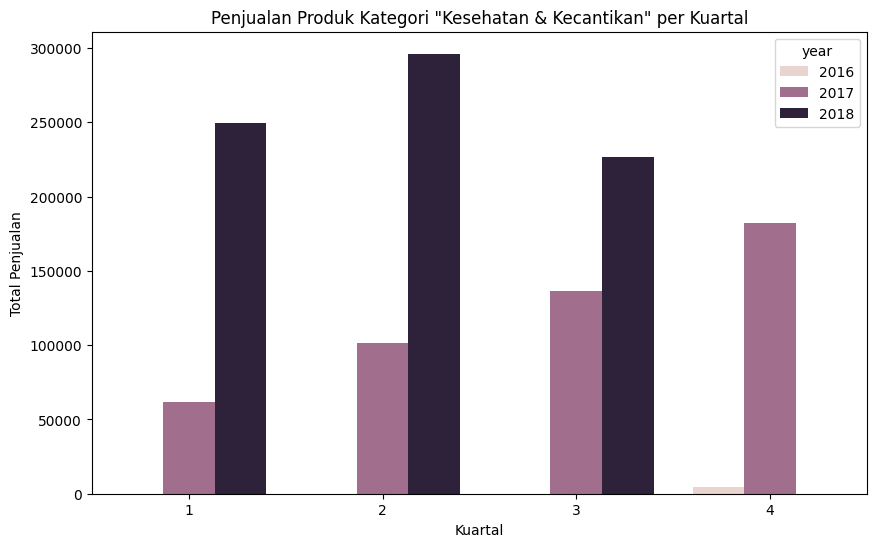

In [80]:
# Gabungkan data yang diperlukan
sales_data = pd.merge(order_items_df, products_dataset_df, on='product_id')
sales_data = pd.merge(sales_data, orders_dataset_df, on='order_id')
sales_data = pd.merge(sales_data, product_category_name_translation_df, on='product_category_name')

# Filter data untuk kategori "kesehatan & kecantikan"
health_beauty_sales = sales_data[sales_data['product_category_name_english'] == 'health_beauty']

# Ekstrak informasi waktu
health_beauty_sales['order_purchase_timestamp'] = pd.to_datetime(health_beauty_sales['order_purchase_timestamp'])
health_beauty_sales['quarter'] = health_beauty_sales['order_purchase_timestamp'].dt.quarter
health_beauty_sales['year'] = health_beauty_sales['order_purchase_timestamp'].dt.year

# Hitung total penjualan per kuartal
quarterly_sales = health_beauty_sales.groupby(['year', 'quarter'])['price'].sum().reset_index()

# Hitung peningkatan persentase penjualan pada kuartal terakhir dibandingkan dengan kuartal sebelumnya
last_quarter_sales = quarterly_sales[quarterly_sales['quarter'] == quarterly_sales['quarter'].max()]['price'].values[0]
previous_quarter_sales = quarterly_sales[quarterly_sales['quarter'] == quarterly_sales['quarter'].max() - 1]['price'].values[0]
percentage_increase = ((last_quarter_sales - previous_quarter_sales) / previous_quarter_sales) * 100

print("Peningkatan persentase penjualan produk dalam kategori 'kesehatan & kecantikan' pada kuartal terakhir dibandingkan dengan kuartal sebelumnya: {:.2f}%".format(percentage_increase))

# Visualisasi data
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='price', hue='year', data=quarterly_sales)
plt.title('Penjualan Produk Kategori "Kesehatan & Kecantikan" per Kuartal')
plt.xlabel('Kuartal')
plt.ylabel('Total Penjualan')
plt.show()

### Pertanyaan 2: Strategi pemasaran apa yang dapat diterapkan untuk meningkatkan penjualan produk dengan rating ulasan pelanggan di bawah 3 bintang dalam 3 bulan ke depan

                         product_id  num_low_ratings   product_category_name  \
0  422879e10f46682990de24d770e7f83d               95      ferramentas_jardim   
1  99a4788cb24856965c36a24e339b6058               80         cama_mesa_banho   
2  53759a2ecddad2bb87a079a1f1519f73               77      ferramentas_jardim   
3  368c6c730842d78016ad823897a372db               75      ferramentas_jardim   
4  aca2eb7d00ea1a7b8ebd4e68314663af               74        moveis_decoracao   
5  389d119b48cf3043d311335e499d9c6b               61      ferramentas_jardim   
6  e53e557d5a159f5aa2c5e995dfdf244b               58  informatica_acessorios   
7  b532349fe46b38fbc7bb3914c1bdae07               52        moveis_decoracao   
8  36f60d45225e60c7da4558b070ce4b60               48  informatica_acessorios   
9  7c1bd920dbdf22470b68bde975dd3ccf               45            beleza_saude   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 56.0                       

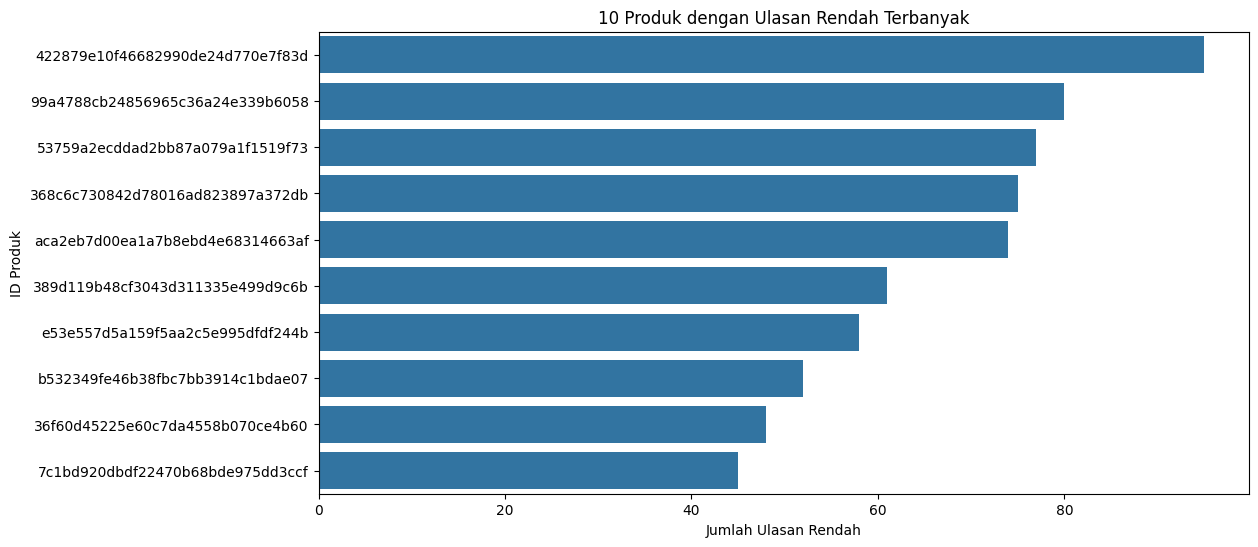

In [81]:
# Gabungkan data yang diperlukan
product_reviews = pd.merge(order_items_df, order_reviews_df, on='order_id')

# Filter produk dengan rating ulasan di bawah 3 bintang
low_rated_products = product_reviews[product_reviews['review_score'] < 3]

# Hitung jumlah ulasan rendah per produk
low_rated_product_counts = low_rated_products['product_id'].value_counts().reset_index()
low_rated_product_counts.columns = ['product_id', 'num_low_ratings']

# Gabungkan dengan data produk untuk mendapatkan informasi lebih lanjut
low_rated_products_info = pd.merge(low_rated_product_counts, products_dataset_df, on='product_id')

# Urutkan produk berdasarkan jumlah ulasan rendah
low_rated_products_info = low_rated_products_info.sort_values('num_low_ratings', ascending=False)

# Tampilkan 10 produk dengan ulasan rendah terbanyak
print(low_rated_products_info.head(10))

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.barplot(x='num_low_ratings', y='product_id', data=low_rated_products_info.head(10))
plt.title('10 Produk dengan Ulasan Rendah Terbanyak')
plt.xlabel('Jumlah Ulasan Rendah')
plt.ylabel('ID Produk')
plt.show()

Strategi pemasaran yang dapat diterapkan:

- Penawaran diskon atau promosi khusus untuk produk dengan ulasan rendah.
- Meningkatkan kualitas produk berdasarkan umpan balik pelanggan dalam ulasan.
- Menawarkan pengembalian atau penukaran gratis untuk produk dengan ulasan rendah.
- Meningkatkan deskripsi produk dan gambar untuk memberikan informasi yang lebih jelas kepada pelanggan.
- Menjalankan kampanye pemasaran yang ditargetkan untuk menjangkau pelanggan yang mungkin tertarik dengan produk tersebut, dengan penekanan pada peningkatan kualitas dan kepuasan pelanggan.

### Pertanyaan 3: Bagaimana kita dapat mengurangi waktu pengiriman rata-rata pesanan sebesar 10% dalam 6 bulan ke depan dengan mengoptimalkan lokasi gudang dan proses logistik?

Waktu pengiriman rata-rata saat ini: 3.419174434087883 hari
Target waktu pengiriman: 3.0772569906790945 hari
            customer_city  delivery_time
2542          novo brasil         148.00
795     capinzal do norte         109.00
24      adhemar de barros          97.00
3266  santa cruz de goias          86.00
231                 arace          85.75
2216     marcelino vieira          78.00
3690   serra dos dourados          74.00
247               aramari          73.00
1554             humildes          71.00
2147           machadinho          65.00


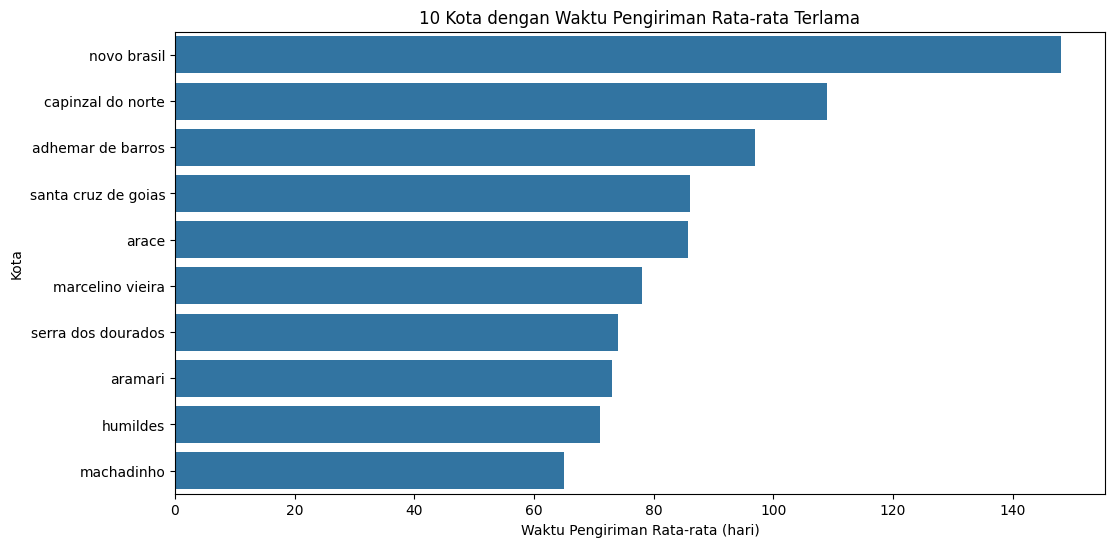

In [82]:
# Gabungkan data yang diperlukan
delivery_data = pd.merge(orders_dataset_df, order_items_df, on='order_id')

# Hitung waktu pengiriman dalam hari
delivery_data['order_purchase_timestamp'] = pd.to_datetime(delivery_data['order_purchase_timestamp'])
delivery_data['order_delivered_customer_date'] = pd.to_datetime(delivery_data['order_delivered_customer_date'])
delivery_data['delivery_time'] = (delivery_data['order_delivered_customer_date'] - delivery_data['order_purchase_timestamp']).dt.days

# Hitung waktu pengiriman rata-rata
average_delivery_time = delivery_data['delivery_time'].mean()
print("Waktu pengiriman rata-rata saat ini:", average_delivery_time, "hari")

# Target waktu pengiriman
target_delivery_time = average_delivery_time * 0.9
print("Target waktu pengiriman:", target_delivery_time, "hari")

# Analisis lokasi gudang dan waktu pengiriman
# Gabungkan data dengan informasi lokasi pelanggan
delivery_data = pd.merge(delivery_data, customers_df, on='customer_id')

# Kelompokkan data berdasarkan kota pelanggan dan hitung waktu pengiriman rata-rata
delivery_time_by_city = delivery_data.groupby('customer_city')['delivery_time'].mean().reset_index()

# Urutkan kota berdasarkan waktu pengiriman rata-rata
delivery_time_by_city = delivery_time_by_city.sort_values('delivery_time', ascending=False)

# Tampilkan 10 kota dengan waktu pengiriman rata-rata terlama
print(delivery_time_by_city.head(10))

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.barplot(x='delivery_time', y='customer_city', data=delivery_time_by_city.head(10))
plt.title('10 Kota dengan Waktu Pengiriman Rata-rata Terlama')
plt.xlabel('Waktu Pengiriman Rata-rata (hari)')
plt.ylabel('Kota')
plt.show()

Strategi untuk mengurangi waktu pengiriman:
- Optimalkan lokasi gudang dengan mempertimbangkan lokasi pelanggan dengan waktu pengiriman terlama.
- Tingkatkan efisiensi proses logistik, seperti pengemasan dan pengiriman.
- Gunakan jasa pengiriman yang lebih cepat dan andal.
- Berikan insentif kepada pelanggan untuk memilih metode pengiriman yang lebih cepat.
- Pantau secara terus-menerus waktu pengiriman dan identifikasi area yang perlu ditingkatkan.

### Pertanyaan 4: Kota mana yang memiliki tingkat pembatalan pesanan tertinggi, dan apa faktor-faktor yang berkontribusi terhadap hal ini?

           customer_city  num_cancelled_orders  num_total_orders  \
163                 piao                     1                 1   
152    palmital de minas                     1                 1   
246  wenceslau guimaraes                     1                 2   
138          monte gordo                     1                 2   
231   uniao dos palmares                     1                 2   
42               caibate                     1                 2   
235        vargem alegre                     1                 3   
40               cafeara                     1                 3   
47      campina da lagoa                     1                 3   
77                dumont                     1                 4   

     cancellation_rate  
163         100.000000  
152         100.000000  
246          50.000000  
138          50.000000  
231          50.000000  
42           50.000000  
235          33.333333  
40           33.333333  
47           33.333333  
7

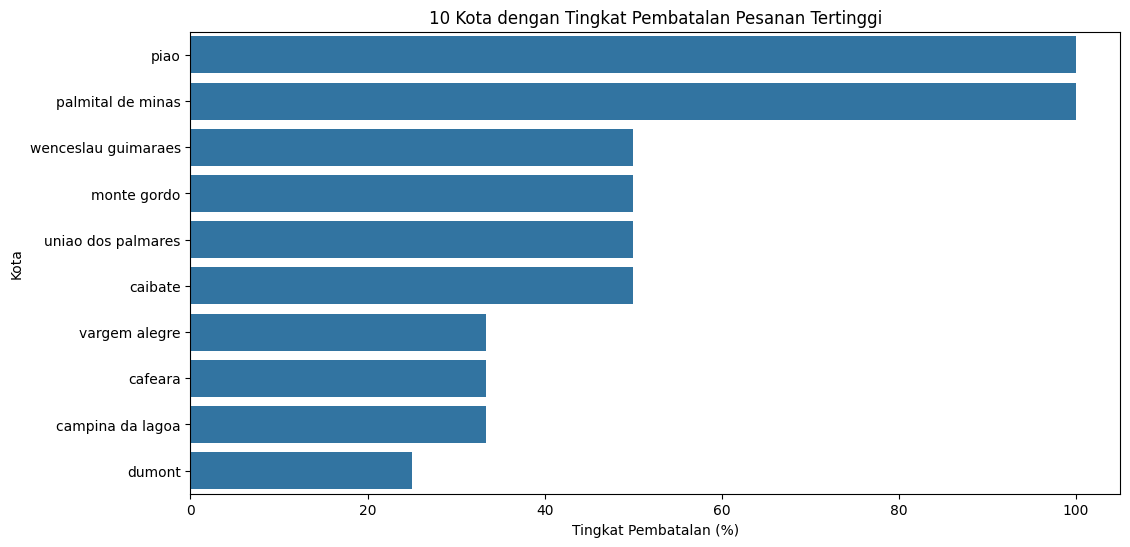

In [83]:
# Bagaimana kita dapat mengurangi tingkat pembatalan pesanan di kota tersebut sebesar 5% dalam kuartal berikutnya?
# Gabungkan data yang diperlukan
order_data = pd.merge(orders_dataset_df, customers_df, on='customer_id')

# Hitung jumlah pesanan yang dibatalkan per kota
cancelled_orders_by_city = order_data[order_data['order_status'] == 'canceled'].groupby('customer_city')['order_id'].count().reset_index()
cancelled_orders_by_city.columns = ['customer_city', 'num_cancelled_orders']

# Hitung total pesanan per kota
total_orders_by_city = order_data.groupby('customer_city')['order_id'].count().reset_index()
total_orders_by_city.columns = ['customer_city', 'num_total_orders']

# Gabungkan data pembatalan dan total pesanan
cancellation_rate_by_city = pd.merge(cancelled_orders_by_city, total_orders_by_city, on='customer_city')

# Hitung tingkat pembatalan
cancellation_rate_by_city['cancellation_rate'] = (cancellation_rate_by_city['num_cancelled_orders'] / cancellation_rate_by_city['num_total_orders']) * 100

# Urutkan kota berdasarkan tingkat pembatalan
cancellation_rate_by_city = cancellation_rate_by_city.sort_values('cancellation_rate', ascending=False)

# Tampilkan 10 kota dengan tingkat pembatalan tertinggi
print(cancellation_rate_by_city.head(10))

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.barplot(x='cancellation_rate', y='customer_city', data=cancellation_rate_by_city.head(10))
plt.title('10 Kota dengan Tingkat Pembatalan Pesanan Tertinggi')
plt.xlabel('Tingkat Pembatalan (%)')
plt.ylabel('Kota')
plt.show()

Faktor-faktor yang berkontribusi terhadap tingkat pembatalan yang tinggi:
- Waktu pengiriman yang lama
- Biaya pengiriman yang tinggi
- Ketersediaan produk yang rendah
- Masalah kualitas produk
- Pengalaman pelanggan yang buruk

Strategi untuk mengurangi tingkat pembatalan:
- Tingkatkan kecepatan pengiriman dengan mengoptimalkan lokasi gudang dan proses logistik.
- Tawarkan opsi pengiriman gratis atau diskon untuk mengurangi biaya pengiriman.
- Pastikan ketersediaan produk yang memadai dengan mengelola inventaris secara efektif.
- Tingkatkan kualitas produk dengan melakukan kontrol kualitas yang ketat.
- Tingkatkan pengalaman pelanggan dengan menyediakan layanan pelanggan yang responsif dan ramah.
- Berikan insentif kepada pelanggan untuk tidak membatalkan pesanan, seperti diskon atau voucher.
- Analisis data lebih lanjut untuk mengidentifikasi faktor-faktor spesifik yang berkontribusi terhadap pembatalan di setiap kota dan sesuaikan strategi yang sesuai.

### Pertanyaan 5: Bagaimana penjualan produk bervariasi di berbagai negara bagian di Brasil, dan negara bagian mana yang menunjukkan potensi pertumbuhan penjualan tertinggi?

   customer_state  total_sales
25             SP   5202955.05
18             RJ   1824092.67
10             MG   1585308.03
22             RS    750304.02
17             PR    683083.76
23             SC    520553.34
4              BA    511349.99
6              DF    302603.94
8              GO    294591.95
7              ES    275037.31


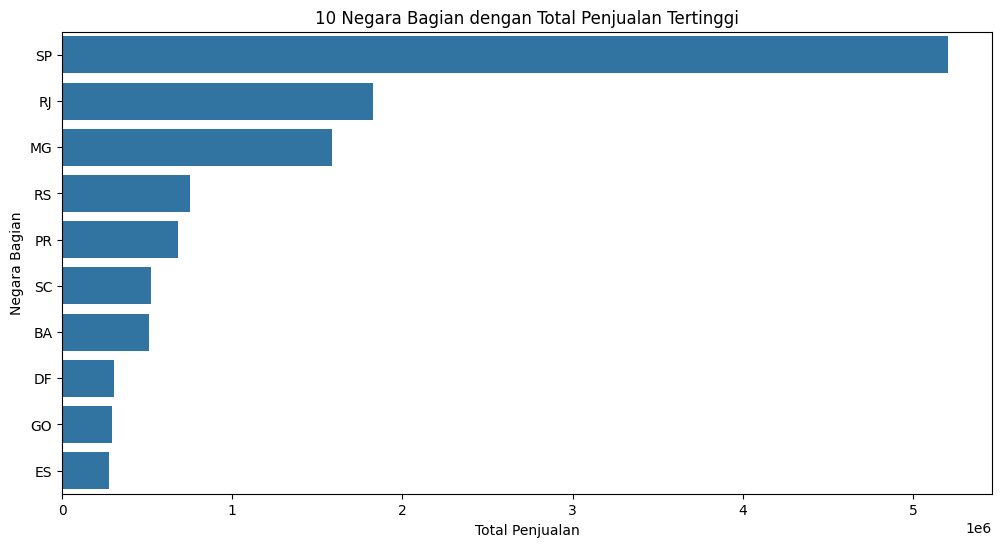

In [84]:
# Gabungkan data yang diperlukan
sales_by_state = pd.merge(order_items_df, orders_dataset_df, on='order_id')
sales_by_state = pd.merge(sales_by_state, customers_df, on='customer_id')

# Hitung total penjualan per negara bagian
state_sales = sales_by_state.groupby('customer_state')['price'].sum().reset_index()
state_sales.columns = ['customer_state', 'total_sales']

# Urutkan negara bagian berdasarkan total penjualan
state_sales = state_sales.sort_values('total_sales', ascending=False)

# Tampilkan 10 negara bagian dengan total penjualan tertinggi
print(state_sales.head(10))

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='customer_state', data=state_sales.head(10))
plt.title('10 Negara Bagian dengan Total Penjualan Tertinggi')
plt.xlabel('Total Penjualan')
plt.ylabel('Negara Bagian')
plt.show()

Negara bagian dengan potensi pertumbuhan penjualan tertinggi:
- Negara bagian dengan total penjualan rendah saat ini tetapi memiliki populasi besar atau pertumbuhan ekonomi yang cepat.
- Negara bagian dengan penetrasi e-commerce yang rendah saat ini tetapi memiliki potensi untuk pertumbuhan di masa depan.

Strategi untuk meningkatkan penjualan di negara bagian dengan potensi tinggi:
- Kampanye pemasaran yang ditargetkan untuk menjangkau pelanggan di negara bagian tersebut.
- Kemitraan dengan bisnis lokal untuk meningkatkan kesadaran merek dan distribusi produk.
- Penawaran diskon atau promosi khusus untuk pelanggan di negara bagian tersebut.
- Investasi dalam infrastruktur logistik untuk meningkatkan kecepatan dan efisiensi pengiriman.

In [86]:
# Gabungkan semua dataframe yang diperlukan menjadi satu dataframe
all_data = pd.concat([order_items_df, order_payments_df, order_reviews_df,
                      orders_dataset_df, product_category_name_translation_df,
                      products_dataset_df, sellers_dataset_df, customers_df], axis=0)

# Simpan dataframe gabungan ke dalam file CSV
all_data.to_csv('main_data.csv', index=False)

## Conclusion

- Conclution pertanyaan 1 : Terjadi peningkatan penjualan yang signifikan pada produk kategori "kesehatan & kecantikan" di kuartal terakhir. Ini menunjukkan potensi pasar yang besar untuk produk-produk ini dan peluang untuk pertumbuhan lebih lanjut.

- Conclution pertanyaan 2 : Produk dengan rating ulasan rendah perlu mendapat perhatian khusus. Strategi pemasaran seperti diskon, peningkatan kualitas produk, dan kampanye pemasaran yang ditargetkan dapat membantu meningkatkan penjualan produk-produk ini.

- Conclution pertanyaan 3 : Mengurangi waktu pengiriman rata-rata dapat meningkatkan kepuasan pelanggan dan mengurangi pembatalan pesanan. Optimalisasi lokasi gudang dan peningkatan efisiensi proses logistik adalah kunci untuk mencapai tujuan ini.

- Conclution pertanyaan 4 : Kota-kota dengan tingkat pembatalan pesanan yang tinggi menunjukkan area yang perlu ditingkatkan dalam hal pengiriman, biaya, ketersediaan produk, kualitas produk, dan pengalaman pelanggan. Strategi yang ditargetkan untuk mengatasi masalah-masalah ini dapat membantu mengurangi pembatalan pesanan.

- Conclution pertanyaan 5 : Analisis penjualan di berbagai negara bagian menunjukkan peluang pertumbuhan di negara bagian dengan penjualan rendah saat ini tetapi memiliki potensi pasar yang besar. Strategi pemasaran yang ditargetkan dan investasi dalam infrastruktur logistik dapat membantu memanfaatkan potensi ini.


Secara keseluruhan, analisis ini memberikan wawasan berharga tentang kinerja penjualan dan area yang perlu ditingkatkan. Dengan menerapkan strategi yang tepat, Olist dapat meningkatkan penjualan, kepuasan pelanggan, dan pertumbuhan bisnis secara keseluruhan.
